<a href="https://colab.research.google.com/github/tranquockinh/Fast-Inversion/blob/main/Compute_DC_weighted_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WAVELENGTH1---WEIGHTING = [0.990257088963181 0.00891908564872612 0.000817944803069296
 5.88058502348572e-6]---PHASE VELOCITY = 139.64479846480992
WAVELENGTH2---WEIGHTING = [0.628455408329312 0.164205648519921 0.145581665010587 0.0617572781401798]---PHASE VELOCITY = 174.59889905022476
WAVELENGTH3---WEIGHTING = [0.405651242628215 0.157970666187639 0.210699561766450 0.225678529417697]---PHASE VELOCITY = 218.3677499535261
WAVELENGTH4---WEIGHTING = [0.292823637080488 0.130359512942169 0.205272258306656 0.371544591670688]---PHASE VELOCITY = 250.4132364391598
WAVELENGTH5---WEIGHTING = [0.227304601153195 0.107462265265411 0.184352721836733 0.480880411744661]---PHASE VELOCITY = 272.7679669154073
WAVELENGTH6---WEIGHTING = [0.185084124233539 0.0902820516226147 0.162843961521340 0.561789862622507]---PHASE VELOCITY = 288.7404869638484
WAVELENGTH7---WEIGHTING = [0.155801263309954 0.0773599449163361 0.144041953289665 0.622796838484044]---PHASE VELOCITY = 300.54577772932925
WAVELENGTH8---WEIGHTING = [

(100.0, 400.0)

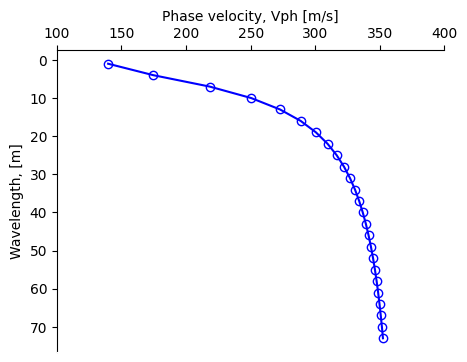

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# DISPERSION
Layer_Data = np.array([[150,2],
                       [200,3],
                       [250,5],
                       [400,np.inf]])
# Arrange vectors of shear wave velocity and depth
Depth = np.append(0,Layer_Data[:,1])
Vs = Layer_Data[:,0]
# Poisson's ratio
PR = 0.3
# Initialize wavelength
DC_points = 25
Lambda = np.zeros((DC_points))
Delta_Lambda = 3
for i in range(DC_points):
    if i == 0:
        Lambda[0] = 1
    else:
        Lambda[i] = Lambda[i-1] + Delta_Lambda
# Function to compute weights
def weighting(D,WL):
    z = sp.symbols('z')
    material_coefficient = 1
    limit_low = D[:-1]
    limit_up = D[1:]
    cv = np.array([0.2507, -0.4341, -0.8474*2*np.pi, -0.3933*2*np.pi])
    cv1 = cv[0] 
    cv2 = cv[1] 
    cv3 = cv[2] 
    cv4 = cv[3]
    # Particle displacement function
    PDF = (cv1*sp.exp(cv3/WL*z) + cv2*sp.exp(cv4/WL*z))*material_coefficient
    # Loop to compute wave a the wavelength given
    num_layer = len(Depth) - 1
    Area_i = np.zeros((num_layer),dtype='object')
    # Total area
    Area = sp.integrate(PDF,(z,0,np.inf))
    for j in range(num_layer):
        Area_i[j] = sp.integrate(PDF,(z,limit_low[j],limit_up[j]))
    weights = Area_i / Area
    return weights,num_layer
# Computing phase velocity by weighted average at each wavelength
beta = (0.87+1.12*PR)/(1+PR)
Vph = np.zeros((DC_points))
for i in range(DC_points):
    wp,num_layer = weighting(Depth,Lambda[i])
    Vph[i] = np.dot(beta*Vs,wp.flatten())
    print(('WAVELENGTH{}---WEIGHTING = {}---PHASE VELOCITY = {}').format(i+1,wp,Vph[i]))
fig,ax = plt.subplots(figsize=(5,4),dpi=100)
ax.plot(Vph,Lambda,'-bo',markerfacecolor='None')
ax.invert_yaxis()
ax.set_xlabel('Phase velocity, Vph [m/s]')
ax.set_ylabel('Wavelength, [m]')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlim(0,Vs[-1])
ax.spines['bottom'].set_color('white')
ax.spines['right'].set_color('white')
ax.set_xlim(100,400)